# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here
data=pd.read_csv("5_a.csv")
df = data.copy()
df.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
def getAnalysis(proba):
    if proba < 0.5:
        return 0
    else:
        return 1

In [4]:
df['y_pre'] = df['proba'].apply(getAnalysis)
df.head()

,y,proba,y_pre
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [5]:
y= df['y']
proba = df['y_pre']

def confusion(y,proba):

  TP = 0
  FP = 0
  FN = 0
  TN = 0

  for i, j in zip(y, proba):
    if i == 1 and j == 1:
      TP = TP + 1
    
    
    elif i == 0 and j == 1:
      FP = FP + 1

    
    elif i == 0 and j == 0:
      TN = TN + 1


    elif i == 1 and j == 0:
      FN = FN + 1                           


  return TP, FP, FN, TN

TP, FP, FN, TN = confusion(y,proba)

In [6]:
A = [TN,FN]
B = [FP,TP]

print(A,B)

[0, 0] [100, 10000]


In [7]:
Confusion_matrix = np.matrix([A, B])

print(Confusion_matrix )

[[    0     0]
 [  100 10000]]


In [8]:
def recall(TP,FP,FN):
  recal  = TP/(TP+FN)

  return recal

def precsion(TP,FP,FN):
  precsions = TP/(TP+FP)

  return precsions

recal = recall(TP,FP,FN)
precsions = precsion(TP,FP,FN)

In [9]:
def TPR1(TP,FN):
  try:
    tpr = TP/(TP+FN)
  except ZeroDivisionError:
    tpr = 0

  return tpr

def FPR1(FP,TN):
  try:
    fpr = FP/(FP+TN)

  except ZeroDivisionError:
    fpr = 0

  return fpr

TPR = TPR1(TP,FN)
FPR = FPR1(FP,FN)

In [10]:
print(recal)
print(precsions)
print(TPR)
print(FPR)

1.0
0.9900990099009901
1.0
1.0


In [11]:
f1_score = 2*((recal*precsions)/(recal+precsions))
print(f1_score)

0.9950248756218906


In [12]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
print(accuracy)

0.9900990099009901


In [13]:
sorted_y_pre = df.sort_values(by=['proba'])
print(sorted_y_pre)

        y     proba  y_pre
5012  1.0  0.500019      1
805   1.0  0.500047      1
7421  1.0  0.500058      1
1630  1.0  0.500058      1
8294  1.0  0.500081      1
...   ...       ...    ...
8324  1.0  0.899768      1
9592  1.0  0.899812      1
1028  1.0  0.899825      1
2099  1.0  0.899828      1
1664  1.0  0.899965      1

[10100 rows x 3 columns]


In [14]:
threshold = sorted_y_pre['proba'].values.tolist()
sort_y = sorted_y_pre['y'].values.tolist()

In [15]:
def compare(value,y,df):
  result = []
  final_result = []
  tpr_list = []
  fpr_list = []
  s = df['y'].value_counts()
  P = s[1]
  N = s[0]
  for i in range(0,10100):
    temp = value[i]
    result = []
    for j in range(0,10100):
      if temp < value[j]:
        result.append(1)
      else:
        result.append(0) 
    final_result.append(result)
    TP, FP, FN, TN = confusion(y,final_result[i])
    tpr_list.append(TP/P)
    fpr_list.append(FP/N)
    
  return tpr_list,fpr_list

tpr_list, fpr_list = compare(threshold,sort_y,sorted_y_pre)

In [16]:
tpr_list.reverse()
fpr_list.reverse()

In [17]:
roc_auc = np.trapz(tpr_list, fpr_list)
print(roc_auc)

0.48829900000000004


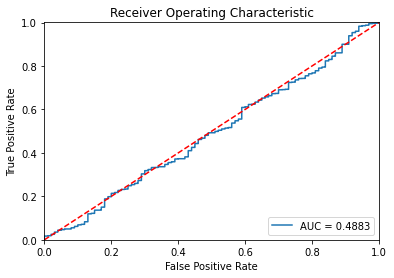

In [18]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_list, tpr_list, label='AUC = %0.4f'% (roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [19]:
# write your code
data=pd.read_csv("5_b.csv")
df = data.copy()
df.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [20]:
def getAnalysis(proba):
    if proba < 0.5:
        return 0
    else:
        return 1

In [21]:
df['y_pre'] = df['proba'].apply(getAnalysis)
df.head()

,y,proba,y_pre
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [22]:
y= df['y']
proba = df['y_pre']

def confusion(y,proba):

  TP = 0
  FP = 0
  FN = 0
  TN = 0

  for i, j in zip(y, proba):
    if i == 1 and j == 1:
      TP = TP + 1
    
    
    elif i == 0 and j == 1:
      FP = FP + 1

    
    elif i == 0 and j == 0:
      TN = TN + 1


    elif i == 1 and j == 0:
      FN = FN + 1                           


  return TP, FP, FN, TN

TP, FP, FN, TN = confusion(y,proba)

In [23]:
A = [TN,FN]
B = [FP,TP]

print(A,B)

[9761, 45] [239, 55]


In [24]:
Confusion_matrix = np.matrix([A, B])

print(Confusion_matrix )

[[9761   45]
 [ 239   55]]


In [25]:
def recall(TP,FP,FN):
  recal  = TP/(TP+FN)

  return recal

def precsion(TP,FP,FN):
  precsions = TP/(TP+FP)

  return precsions

recal = recall(TP,FP,FN)
precsions = precsion(TP,FP,FN)

In [26]:
def TPR1(TP,FN):
  try:
    tpr = TP/(TP+FN)
  except ZeroDivisionError:
    tpr = 0

  return tpr

def FPR1(FP,TN):
  try:
    fpr = FP/(FP+TN)

  except ZeroDivisionError:
    fpr = 0

  return fpr

TPR = TPR1(TP,FN)
FPR = FPR1(FP,FN)

In [27]:
print(recal)
print(precsions)
print(TPR)
print(FPR)

0.55
0.1870748299319728
0.55
0.8415492957746479


In [28]:
f1_score = 2*((recal*precsions)/(recal+precsions))
print(f1_score)

0.2791878172588833


In [29]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
print(accuracy)

0.9718811881188119


In [30]:
sorted_y_pre = df.sort_values(by=['proba'])
print(sorted_y_pre)

        y     proba  y_pre
313   0.0  0.100001      0
1938  0.0  0.100161      0
1360  0.0  0.100165      0
2532  0.0  0.100189      0
8290  0.0  0.100230      0
...   ...       ...    ...
8578  1.0  0.588718      1
110   1.0  0.590171      1
1657  1.0  0.592198      1
1978  1.0  0.594808      1
8446  1.0  0.595294      1

[10100 rows x 3 columns]


In [31]:
threshold = sorted_y_pre['proba'].values.tolist()
sort_y = sorted_y_pre['y'].values.tolist()

In [32]:
def compare(value,y,df):
  result = []
  final_result = []
  tpr_list = []
  fpr_list = []
  s = df['y'].value_counts()
  P = s[1]
  N = s[0]
  for i in range(0,10100):
    temp = value[i]
    result = []
    for j in range(0,10100):
      if temp < value[j]:
        result.append(1)
      else:
        result.append(0) 
    final_result.append(result)
    TP, FP, FN, TN = confusion(y,final_result[i])
    tpr_list.append(TP/P)
    fpr_list.append(FP/N)
    
  return tpr_list,fpr_list

tpr_list, fpr_list = compare(threshold,sort_y,sorted_y_pre)

In [33]:
tpr_list.reverse()
fpr_list.reverse()

In [34]:
roc_auc = np.trapz(tpr_list, fpr_list)
print(roc_auc)

0.9376570000000001


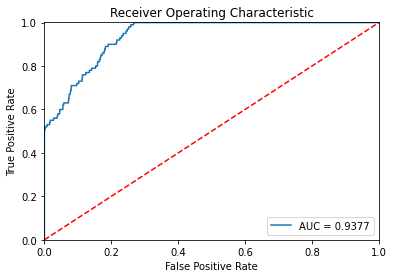

In [35]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_list, tpr_list, label='AUC = %0.4f'% (roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [36]:
 # write your code

data=pd.read_csv("5_c.csv")
df = data.copy()
df.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [37]:
def getAnalysis(prob):
    if prob < 0.5:
        return 0
    else:
        return 1

In [38]:
df['y_pre'] = df['prob'].apply(getAnalysis)
df.head()

,y,prob,y_pre
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0


In [39]:
y= df['y']
proba = df['y_pre']

def confusion(y,proba):

  TP = 0
  FP = 0
  FN = 0
  TN = 0

  for i, j in zip(y, proba):
    if i == 1 and j == 1:
      TP = TP + 1
    
    
    elif i == 0 and j == 1:
      FP = FP + 1

    
    elif i == 0 and j == 0:
      TN = TN + 1


    elif i == 1 and j == 0:
      FN = FN + 1                           


  return TP, FP, FN, TN

TP, FP, FN, TN = confusion(y,proba)

In [40]:
A = [TN,FN]
B = [FP,TP]

print(A,B)

[1637, 462] [168, 585]


In [43]:
Confusion_matrix = np.matrix([A, B])

print(Confusion_matrix )

[[1637  462]
 [ 168  585]]


In [44]:
def recall(TP,FP,FN):
  recal  = TP/(TP+FN)

  return recal

def precsion(TP,FP,FN):
  precsions = TP/(TP+FP)

  return precsions

recal = recall(TP,FP,FN)
precsions = precsion(TP,FP,FN)

In [45]:
def TPR1(TP,FN):
  try:
    tpr = TP/(TP+FN)
  except ZeroDivisionError:
    tpr = 0

  return tpr

def FPR1(FP,TN):
  try:
    fpr = FP/(FP+TN)

  except ZeroDivisionError:
    fpr = 0

  return fpr

TPR = TPR1(TP,FN)
FPR = FPR1(FP,FN)

In [46]:
print(recal)
print(precsions)
print(TPR)
print(FPR)

0.5587392550143266
0.7768924302788844
0.5587392550143266
0.26666666666666666


In [47]:
f1_score = 2*((recal*precsions)/(recal+precsions))
print(f1_score)

0.65


In [48]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
print(accuracy)

0.7791023842917251


In [49]:
sorted_y_pre = df.sort_values(by=['prob'])
print(sorted_y_pre)

      y      prob  y_pre
473   0  0.028038      0
412   0  0.028396      0
454   0  0.028964      0
435   0  0.030269      0
468   0  0.031114      0
...  ..       ...    ...
2456  1  0.941113      1
2788  1  0.944094      1
2447  1  0.948638      1
2548  1  0.951437      1
2634  1  0.957747      1

[2852 rows x 3 columns]


In [50]:
threshold = sorted_y_pre['prob'].values.tolist()
sort_y = sorted_y_pre['y'].values.tolist()

In [51]:
def min_metric(value,y,df):
  result = []
  final_result = []
  tpr_list = []
  fpr_list = []
  s = df['y'].value_counts()
  P = s[1]
  N = s[0]
  metric = {}
  for i in range(0,len(value)):
    temp = value[i]
    result = []
    for j in range(0,len(value)):
      if temp < value[j]:
        result.append(1)
      else:
        result.append(0) 
    final_result.append(result)
    TP, FP, FN, TN = confusion(y,final_result[i])
    metric_val=(500*FN)+(100*FP)
    metric[temp]=metric_val
    
  return (metric)

result = min_metric(threshold,sort_y,sorted_y_pre)
temp = min(result.values()) 
res = [key for key in result if result[key] == temp]
print('the key:value pair for min value of the specified metric is-',res,temp)

the key:value pair for min value of the specified metric is- [0.22987164436159915] 141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [52]:
data_d=pd.read_csv("5_d.csv")
data_d.shape
data_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [53]:
def error(df,col1,col2):
    val=[]
    for index, (value1, value2) in enumerate(zip(df[col1], df[col2])):
        val.append(value1-value2)
    return val
    
def absolute_error(df,col):
    val=[]
    for index,value in enumerate(df[col]):
        val.append(abs(value))
    return val

def mean_sq_error(df,col):
    return ss_res(df,col)/len(df[col])

def mape(df,col1,col2):
    val=sum(df[col1])/sum(df[col2])
    return val

def ss_res(df,col):
    val=0
    for index,value in enumerate(df[col]):
        val=val+(value*value)
    return val

def ss_tot(df,col):
    val=0
    mean_val=data_d['y'].mean()
    for index,value in enumerate(df[col]):
        val=val+ (value-mean_val)*(value-mean_val)
    return val

In [54]:
data_d['error']=error(data_d,'y','pred')
data_d['abs_error']=absolute_error(data_d,'error')

In [55]:
MSE=mean_sq_error(data_d,'error')
print("the Mean squared error is : ", MSE)

the Mean squared error is :  177.16569974554707


In [56]:
MAPE=mape(data_d,'abs_error','y')
print('the MAPE value is :', MAPE)

the MAPE value is : 0.1291202994009687


In [57]:
SS_RES=ss_res(data_d,'error')
SS_TOT=ss_tot(data_d,'y')
R_square= 1- (SS_RES/SS_TOT)
print('the Co-efficient of determination value is: ',R_square)

the Co-efficient of determination value is:  0.9563582786990964
